In [2]:
import pandas as pd
import numpy as np


train_raw = pd.read_csv('data/train.csv', index_col='id')

In [3]:
train_raw.head()

,query,product_title,product_description,median_relevance,relevance_variance
id,,,,,
1,bridal shower decorations,Accent Pillow with Heart Design - Red/Black,Red satin accent pillow embroidered with a hea...,1,0.000
2,led christmas lights,Set of 10 Battery Operated Multi LED Train Chr...,Set of 10 Battery Operated Train Christmas Lig...,4,0.000
4,projector,ViewSonic Pro8200 DLP Multimedia Projector,NaN,4,0.471
5,wine rack,Concept Housewares WR-44526 Solid-Wood Ceiling...,"Like a silent and sturdy tree, the Southern En...",4,0.000
7,light bulb,Wintergreen Lighting Christmas LED Light Bulb ...,"WTGR1011\nFeatures\nNickel base, 60,000 averag...",2,0.471


In [4]:
print train_raw.describe()

       median_relevance  relevance_variance
count      10158.000000        10158.000000
mean           3.309805            0.377863
std            0.980666            0.389707
min            1.000000            0.000000
25%            3.000000            0.000000
50%            4.000000            0.471000
75%            4.000000            0.471000
max            4.000000            1.470000


In [5]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
from collections import Counter

df = train_raw[['product_description']]

In [6]:
length = []
for i, r in df.iterrows():
    x = r[0]
    x = len(str(x))
    length.append(x)

In [7]:
print len(length)

10158


In [8]:
leng = Counter(length)

In [9]:
print len(leng)

1452


In [10]:
kk, vv = [], []
for k,v in enumerate(leng):
    kk.append(k)
    vv.append(v)

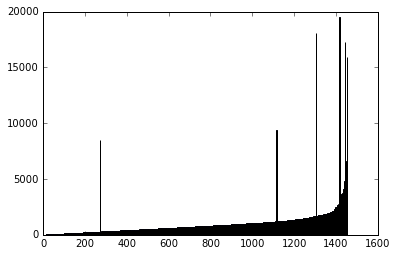

In [11]:
plt.bar(kk, vv)
plt.show()

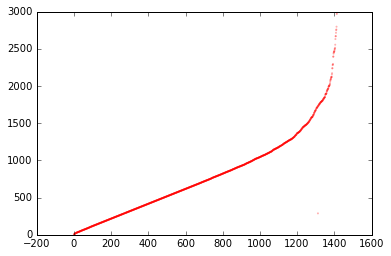

In [12]:
plt.scatter(kk, vv, s=4, c='red', alpha=0.3, edgecolors='none')
plt.ylim([0,3000])
plt.show()

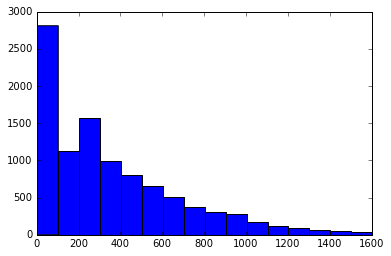

In [13]:
plt.hist(length, bins=range(min(length), max(length) + 100, 100))
plt.xlim([0,1600])
plt.show()

In [14]:
df2 = train_raw[['product_description']].fillna('')

In [15]:
length2 = []
for i, r in df.iterrows():
    x = r[0]
    x = len(str(x))
    if x > 1:
        length2.append(x)

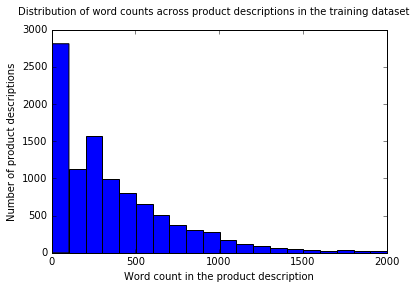

In [16]:
plt.hist(length2, bins=range(min(length2), max(length2) + 100, 100))
plt.xlim([0,2000])
plt.suptitle('Distribution of word counts across product descriptions in the training dataset')
plt.xlabel('Word count in the product description')
plt.ylabel('Number of product descriptions')
plt.savefig('word_count_dist_product_description.png', dpi=200)
plt.show()

In [17]:
df2.head()

,product_description
id,
1,Red satin accent pillow embroidered with a hea...
2,Set of 10 Battery Operated Train Christmas Lig...
4,
5,"Like a silent and sturdy tree, the Southern En..."
7,"WTGR1011\nFeatures\nNickel base, 60,000 averag..."


In [18]:
print np.arange(0,1.05,0.05)

[ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55
  0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95  1.  ]


In [24]:
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from itertools import cycle

In [66]:
traindata = list(train_raw.apply(lambda x:'%s %s %s' % (x['query'],x['product_title'], x['product_description']),axis=1))

y = train_raw.median_relevance.values

tfv = TfidfVectorizer(min_df=3,  max_features=None, 
        strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
        ngram_range=(1, 4), use_idf=1,smooth_idf=1,sublinear_tf=1,
        stop_words = 'english')

tfv.fit(traindata)
X =  tfv.transform(traindata) 

X_pca = TruncatedSVD(n_components=400).fit_transform(X)

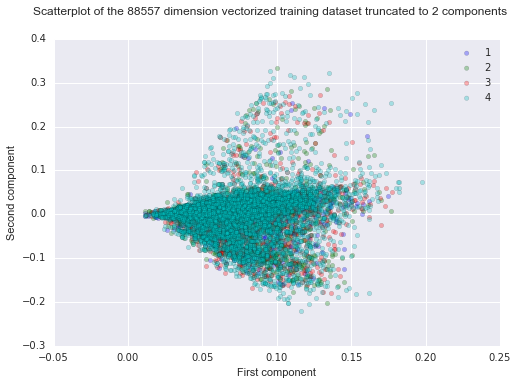

In [67]:
colors = ['b', 'g', 'r', 'c']

for i, c in zip(np.unique(y), cycle(colors)):
    plt.scatter(X_pca[y == i, 0],
               X_pca[y == i, 1],
               c=c, label=i, alpha=0.3)
plt.legend(loc='best')
plt.suptitle('Scatterplot of the 88557 dimension vectorized training dataset truncated to 2 components')
plt.xlabel('First component')
plt.ylabel('Second component')
plt.show()
# plt.savefig('visualization.png')

In [68]:
X_pca[:10]

array([[  7.30028579e-02,  -4.93052188e-04,   9.66336486e-03, ...,
         -6.78305667e-03,  -5.11359347e-02,   3.35000101e-03],
       [  1.48061251e-01,   3.74019153e-02,   3.77357344e-02, ...,
          3.26982369e-02,  -1.94778816e-02,  -1.40725258e-02],
       [  3.29493376e-02,   5.93836258e-03,   8.82336090e-03, ...,
          3.75280899e-03,  -4.21206398e-03,   1.42788263e-02],
       ..., 
       [  9.34142162e-02,   3.96369225e-02,   1.96044971e-01, ...,
         -3.50855506e-02,  -1.09031300e-02,  -1.54861461e-04],
       [  1.19778489e-01,   6.91955461e-02,  -1.52562170e-02, ...,
          1.14620022e-02,   4.00356235e-03,  -5.04676985e-03],
       [  7.59487069e-02,   6.99596284e-02,  -5.30645466e-02, ...,
          1.72785738e-03,   2.08283009e-02,   1.41686830e-03]])

In [69]:
features = tfv.get_feature_names()

In [70]:
len(features)

88557

In [71]:
top_n = 2
indices = np.argsort(tfv.idf_)[::-1]
top_features = [features[i] for i in indices[:top_n]]
print top_features

[u'l x 2', u'nourish moisturize conditioner']


In [72]:
print ind[:6]

[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]]


In [73]:
from sklearn.manifold import TSNE

In [74]:
X_Train_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_pca)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10158
[t-SNE] Computed conditional probabilities for sample 2000 / 10158
[t-SNE] Computed conditional probabilities for sample 3000 / 10158
[t-SNE] Computed conditional probabilities for sample 4000 / 10158
[t-SNE] Computed conditional probabilities for sample 5000 / 10158
[t-SNE] Computed conditional probabilities for sample 6000 / 10158
[t-SNE] Computed conditional probabilities for sample 7000 / 10158
[t-SNE] Computed conditional probabilities for sample 8000 / 10158
[t-SNE] Computed conditional probabilities for sample 9000 / 10158
[t-SNE] Computed conditional probabilities for sample 10000 / 10158
[t-SNE] Computed conditional probabilities for sample 10158 / 10158
[t-SNE] Mean sigma: 0.239583
[t-SNE] Iteration 25: error = 1.3342750, gradient norm = 0.0012757
[t-SNE] Iteration 50: error = 1.3316863, gradient norm = 0.0088175
[t-SNE] Iterati

In [75]:
print X_Train_embedded.shape

(10158, 2)


In [76]:
dfsvd = pd.DataFrame(X_pca, columns=['c{}'.format(c) for c in range(400)], index=df.index)
dftsne = pd.DataFrame(X_Train_embedded, columns=['x','y'], index=dfsvd.index)

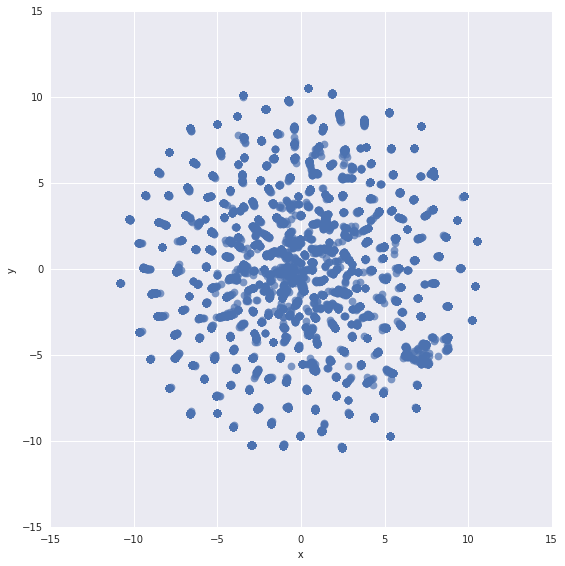

In [77]:
ax = sns.lmplot('x', 'y', dftsne, fit_reg=False, size=8
                ,scatter_kws={'alpha':0.7,'s':60})

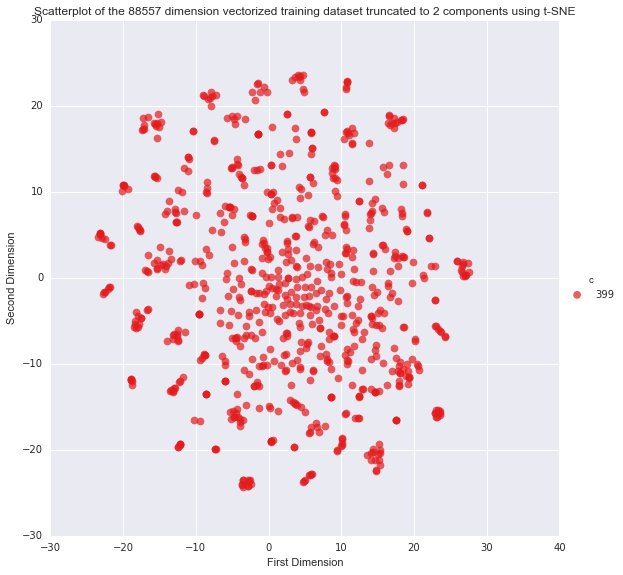

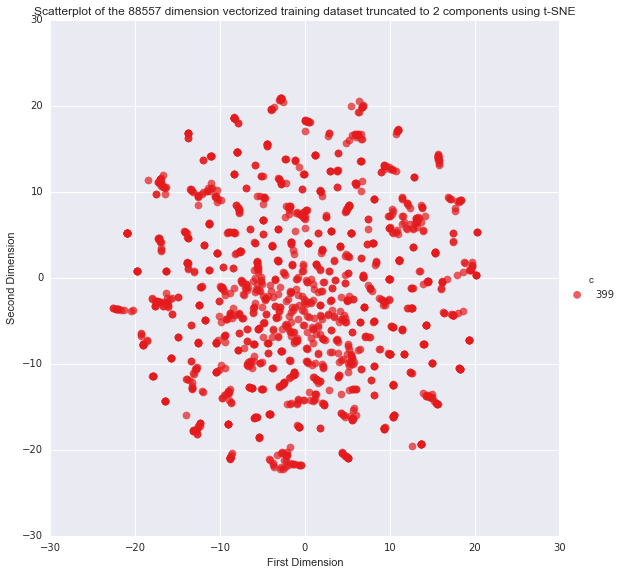

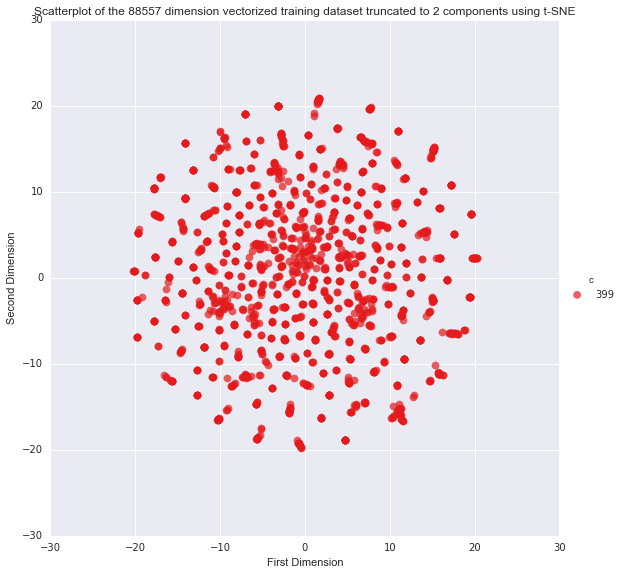

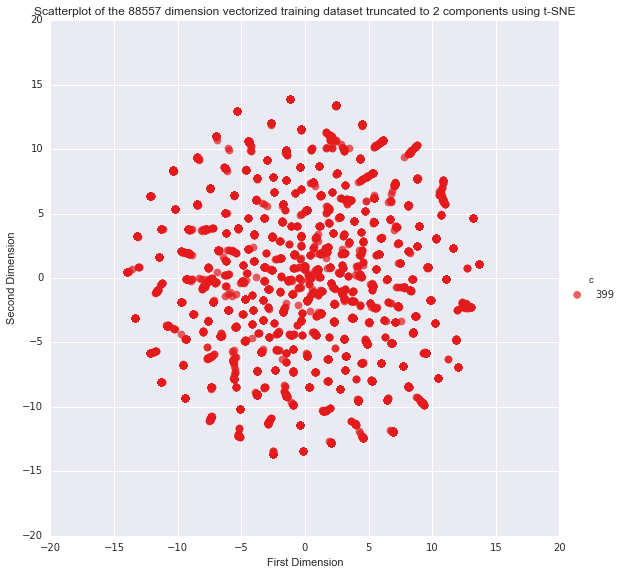

In [87]:
for i, c in zip(np.unique(y), cycle(colors)):
    X_Train_embedded = TSNE(n_components=2, perplexity=40).fit_transform(X_pca[y == i])
    dfsvd = pd.DataFrame(X_pca[y == i], columns=['c{}'.format(c) for c in range(400)])
    dftsne = pd.DataFrame(X_Train_embedded, columns=['First Dimension','Second Dimension'], index=dfsvd.index)
    dftsne['c'] = c
    ax = sns.lmplot('First Dimension', 'Second Dimension', dftsne, hue='c', fit_reg=False, size=8, palette='Set1'
                    ,scatter_kws={'alpha':0.7,'s':60})
    ax.axes.flat[0].set_title('Scatterplot of the 88557 dimension vectorized training dataset truncated to 2 components using t-SNE')

In [93]:
import csv
import re
import math
d={}
d2={}
li=0
la=0
ws=""
cl=0
w2=[]
w=[]
s=""
a=[]
dlabels={"1":0,"2":1,"3":2,"4":3}
dvals={"0":1,"1":2,"2":3,"3":4}
t = [0,0,0,0]

with open("data/train.csv") as f:
    d2= csv.DictReader(f)
    for line in d2:
        #print (line)
        cl=int(dlabels[line['median_relevance']])
        s=(" ").join(["q"+ z for z in line["query"].split(" ")])  + " " + line["product_title"] + " " + line["product_description"]
        s=re.sub(r'<([^>]+)>', ' ', s)
        s=s.replace('\r',' ').replace('\n',' ').replace('\t',' ').lower()
        s=re.sub(r'[^a-z0-9]',' ', s)
        w=list(set(s.split(" ")))
        for i in range(len(w)):
            if len(str(w[i]))>2:
                if str(w[i]) in d:
                    wc = list(d[str(w[i])])
                    wc[cl]+=1
                    t[cl]+=1
                    d[str(w[i])]=list(wc)
                else:
                    wc = [0 for k in range(len(dlabels))]
                    wc[cl]+=1
                    t[cl]+=1
                    d[str(w[i])]=list(wc)
    li+=1
f.close

d1={}
h=0.0
t_labels=[]
t_labels1=[]
stopw=['to', 'in', 'and', 'can', 'has', 'with', 'features', 'your', 'black', 'easy', 'from', 'style', 'all', 'you', 'design', 'use', 'will', 'made', 'as', 'it', 'up', 'is', 'are', 'for', 'that', 'of', 'set', 'an', 'be', 'by', 'on', 'the', 'or', 'this', 'one']
for st in stopw:
    if st in d:
        del d[st]
with open("data/test.csv") as f:
    d1= csv.DictReader(f)
    for line in d1:
        t_labels.append(line["id"])
        s=(" ").join(["q"+ z for z in line["query"].split(" ")])  + " " + line["product_title"] + " " + line["product_description"]
        s=re.sub(r'<([^>]+)>', ' ', s)
        s=s.replace('\r',' ').replace('\n',' ').replace('\t',' ').lower()
        s=re.sub(r'[^a-z0-9]',' ', s)
        w=list(set(s.split(" ")))
        we = [0 for k in range(len(dlabels))]
        for i in range(len(w)):
            if str(w[i]) in d:
                wc = list(d[str(w[i])])
                for j in range(len(wc)):
                    h= float(wc[j]) / float(sum(wc))
                    if h > 0.75 and sum(wc) > 5:
                        h= h * 100
                    if sum(wc)>1000: 
                        print (str(w[i]))
                    #print(wc[j],sum(wc),h,t[j],we[j])
                    we[j]= float(we[j]) + float(h / t[j])
                    #tf_idf= (wc[j]/float(sum(wc))) *(sum(t)/float(sum(wc)))
                    #if sum(wc)>1000:
                    #   stopw.append(str(w[i]))
                    #print(wc[j],sum(wc),t[j],we[j])
                    #we[j]+=tf_idf
        c=0.0
        g=0
        for z in range(len(we)):
            if we[z] > c:
                    g = z
                    c = we[z]
        t_labels1.append(dvals[str(g)])
#print(list(set(stopw)))
#HTML Comments Only
h=[]
h.append("<html><head><script type='text/javascript' src='https://www.google.com/jsapi'></script><script type='text/javascript'>google.load('visualization', '1',{packages:['treemap']});google.setOnLoadCallback(drawChart);function drawChart() {var data = google.visualization.arrayToDataTable([['Words', 'Parent', 'Count'],['B_O_W', null, 0],")
for k,v in d.items():
    p=int(sum(v))
    if p>500:
        h.append("['" + str(k) + "','B_O_W'," + str(p) + " ],")
h.append("]);tree = new google.visualization.TreeMap(document.getElementById('chart_div'));tree.draw(data, {});}</script></head><body><div id='chart_div' style='width: 700px; height: 500px;'></div></body></html>")
with open("output.html","w") as f:
    for i in range(len(h)):
        f.write(h[i]+"\n")
f.close()

In [95]:
import numpy as np
from sklearn.metrics import accuracy_score, mean_absolute_error

# The following 3 functions have been taken from Ben Hamner's github repository
# https://github.com/benhamner/Metrics
def confusion_matrix(rater_a, rater_b, min_rating=None, max_rating=None):
    """
    Returns the confusion matrix between rater's ratings
    """
    assert(len(rater_a) == len(rater_b))
    if min_rating is None:
        min_rating = min(rater_a + rater_b)
    if max_rating is None:
        max_rating = max(rater_a + rater_b)
    num_ratings = int(max_rating - min_rating + 1)
    conf_mat = [[0 for i in range(num_ratings)]
                for j in range(num_ratings)]
    for a, b in zip(rater_a, rater_b):
        conf_mat[a - min_rating][b - min_rating] += 1
    return conf_mat


def histogram(ratings, min_rating=None, max_rating=None):
    """
    Returns the counts of each type of rating that a rater made
    """
    if min_rating is None:
        min_rating = min(ratings)
    if max_rating is None:
        max_rating = max(ratings)
    num_ratings = int(max_rating - min_rating + 1)
    hist_ratings = [0 for x in range(num_ratings)]
    for r in ratings:
        hist_ratings[r - min_rating] += 1
    return hist_ratings


def quadratic_weighted_kappa(y, y_pred):
    """
    Calculates the quadratic weighted kappa
    axquadratic_weighted_kappa calculates the quadratic weighted kappa
    value, which is a measure of inter-rater agreement between two raters
    that provide discrete numeric ratings.  Potential values range from -1
    (representing complete disagreement) to 1 (representing complete
    agreement).  A kappa value of 0 is expected if all agreement is due to
    chance.
    quadratic_weighted_kappa(rater_a, rater_b), where rater_a and rater_b
    each correspond to a list of integer ratings.  These lists must have the
    same length.
    The ratings should be integers, and it is assumed that they contain
    the complete range of possible ratings.
    quadratic_weighted_kappa(X, min_rating, max_rating), where min_rating
    is the minimum possible rating, and max_rating is the maximum possible
    rating
    """
    rater_a = y
    rater_b = y_pred
    min_rating=None
    max_rating=None
    rater_a = np.array(rater_a, dtype=int)
    rater_b = np.array(rater_b, dtype=int)
    assert(len(rater_a) == len(rater_b))
    if min_rating is None:
        min_rating = min(min(rater_a), min(rater_b))
    if max_rating is None:
        max_rating = max(max(rater_a), max(rater_b))
    conf_mat = confusion_matrix(rater_a, rater_b,
                                min_rating, max_rating)
    num_ratings = len(conf_mat)
    num_scored_items = float(len(rater_a))

    hist_rater_a = histogram(rater_a, min_rating, max_rating)
    hist_rater_b = histogram(rater_b, min_rating, max_rating)

    numerator = 0.0
    denominator = 0.0

    for i in range(num_ratings):
        for j in range(num_ratings):
            expected_count = (hist_rater_a[i] * hist_rater_b[j]
                              / num_scored_items)
            d = pow(i - j, 2.0) / pow(num_ratings - 1, 2.0)
            numerator += d * conf_mat[i][j] / num_scored_items
            denominator += d * expected_count / num_scored_items

    return (1.0 - numerator / denominator)
    
Y_real = np.array([1,2,3,1,4,4,4,4,4,4])  
Y_pred = np.array([4,2,3,1,4,4,4,4,4,4])

print("ONE EXTREME ERROR")
print("Ground truth:\t%s"%Y_real)
print("Predicted   :\t%s"%Y_pred)
print("MAE         :\t%s"%mean_absolute_error(Y_real,Y_pred))
print("Accuracy    :\t%s"%accuracy_score(Y_real,Y_pred))
print("Kappa       :\t%s"%quadratic_weighted_kappa(Y_real,Y_pred))
print

Y_real = np.array([1,2,3,1,4,4,4,4,4,4])
Y_pred = np.array([1,2,3,1,4,3,3,3,3,2])

print("FIVE SMALL ERRORS")
print("Ground truth:\t%s"%Y_real)
print("Predicted   :\t%s"%Y_pred)
print("MAE         :\t%s"%mean_absolute_error(Y_real,Y_pred))
print("Accuracy    :\t%s"%accuracy_score(Y_real,Y_pred))
print("Kappa       :\t%s"%quadratic_weighted_kappa(Y_real,Y_pred))
print

Y_real = np.array([1,1,3,1,4,4,4,4,4,4])
Y_pred = np.array([1,1,3,1,4,3,3,3,3,2])

print("KAPPA CHANGES WHEN DISTRIBUTION CHANGES")
print("Ground truth:\t%s"%Y_real)
print("Predicted   :\t%s"%Y_pred)
print("MAE         :\t%s"%mean_absolute_error(Y_real,Y_pred))
print("Accuracy    :\t%s"%accuracy_score(Y_real,Y_pred))
print("Kappa       :\t%s"%quadratic_weighted_kappa(Y_real,Y_pred))

ONE EXTREME ERROR
Ground truth:	[1 2 3 1 4 4 4 4 4 4]
Predicted   :	[4 2 3 1 4 4 4 4 4 4]
MAE         :	0.3
Accuracy    :	0.9
Kappa       :	0.656488549618

FIVE SMALL ERRORS
Ground truth:	[1 2 3 1 4 4 4 4 4 4]
Predicted   :	[1 2 3 1 4 3 3 3 3 2]
MAE         :	0.6
Accuracy    :	0.5
Kappa       :	0.703703703704

KAPPA CHANGES WHEN DISTRIBUTION CHANGES
Ground truth:	[1 1 3 1 4 4 4 4 4 4]
Predicted   :	[1 1 3 1 4 3 3 3 3 2]
MAE         :	0.6
Accuracy    :	0.5
Kappa       :	0.75
